In [81]:
%load_ext autoreload
%autoreload 2
import os
print(os.getcwd())
to_run = True
if to_run:
    os.chdir('..')
    to_run = False
print(os.getcwd())

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/
/


# Group Details

**Group ID:** 
20

**Group name:** 
Mandatory Assignments 20

**Group members that contributed to the assignment (full name):**
Shatin Nguyen, hlv332
Theis Baasch, thb763


# Option 2: Nesting visualization

Extend DCR4Py with support for the visualization of nested DCR graphs. To get started, have a look at the visualization of classic DCR Graphs: https://github.com/paul-cvp/pm4py-dcr/blob/feature/dcr_in_pm4py_revised/pm4py/visualization/dcr/variants/classic.py


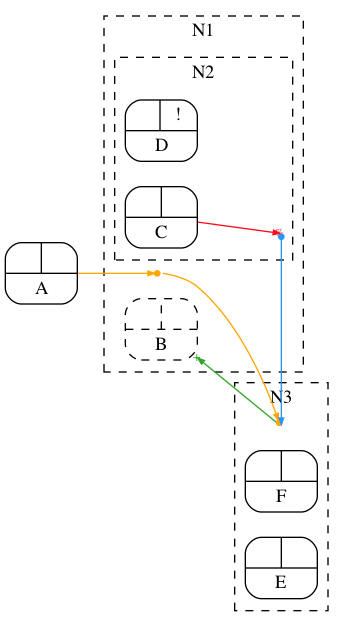

In [82]:
import pandas as pd
import pm4py

from pm4py.objects.dcr.hierarchical.obj import HierarchicalDcrGraph
graph = HierarchicalDcrGraph()

events = [
    "A", "B", "C", "D", "E", "F"
]

groups = [    
    "N1", "N2", "N3"
]

for event in events:
    graph.events.add(event)
    graph.labels.add(event)
    graph.label_map[event] = event
    graph.marking.included.add(event)

for event in groups:
    graph.events.add(event)
    graph.labels.add(event)
    graph.label_map[event] = event

graph.nestedgroups["N1"] =  {"B", "N2"} 
graph.nestedgroups["N2"] =  {"C", "D"} 
graph.nestedgroups["N3"] =  {"E", "F"} 

for group, events in graph.nestedgroups.items():
    for e in events:
        graph.nestedgroups_map[e] = group

graph.marking.included.remove("B")
graph.marking.pending.add("D")


graph.conditions["N1"] = {"A"}
graph.conditions["N3"] = {"N1"}

graph.responses["N2"] = {"N3"}

graph.includes["N3"] = {"B"}

graph.excludes["C"] = {"N2"}


pm4py.view_dcr(graph)


# Option 2: example output

Note: your visualization doesn't need to match this exactly and it does not need to produce the same layout, but the hiearchical structure should be clearly the same.

![Description](DCR_(26).png)


Our output matches the hierachical structure if you taking into consideration that the relations to the nested box is inside the box and do not point to the edge of the box.

# Additional tests

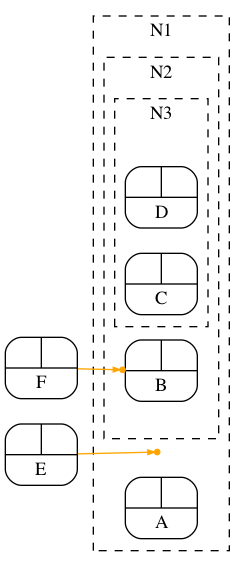

In [83]:
graph1 = HierarchicalDcrGraph()

test_event1 = ["A", "B", "C", "D", "E", "F"]
test_group1 = ["N1", "N2", "N3"]

for event in test_event1:
    graph1.events.add(event)
    graph1.labels.add(event)
    graph1.label_map[event] = event
    graph1.marking.included.add(event)

for event in test_group1:
    graph1.events.add(event)
    graph1.labels.add(event)
    graph1.label_map[event] = event

graph1.nestedgroups["N1"] =  {"A", "N2"}
graph1.nestedgroups["N2"] =  {"B", "N3"} 
graph1.nestedgroups["N3"] =  {"C", "D"}


for group, events in graph1.nestedgroups.items():
    for e in events:
        graph1.nestedgroups_map[e] = group
    
graph1.conditions["N1"] = {"E"}
graph1.conditions["B"] = {"F"}

pm4py.view_dcr(graph1)

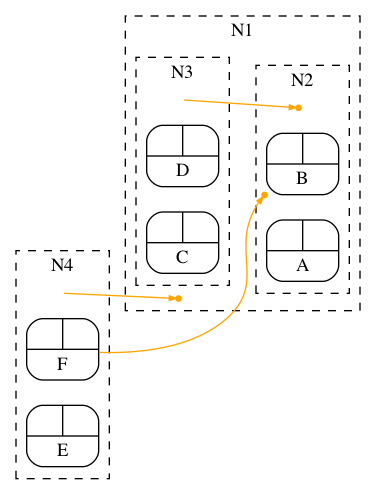

In [84]:
graph2 = HierarchicalDcrGraph()

test_event2 = ["A", "B", "C", "D", "E", "F"]
test_group2 = ["N1", "N2", "N3", "N4"]

for event in test_event2:
    graph1.events.add(event)
    graph1.labels.add(event)
    graph1.label_map[event] = event
    graph1.marking.included.add(event)

for event in test_group2:
    graph1.events.add(event)
    graph1.labels.add(event)
    graph1.label_map[event] = event

graph1.nestedgroups["N1"] =  {"N2", "N3"}
graph1.nestedgroups["N2"] =  {"A", "B"} 
graph1.nestedgroups["N3"] =  {"C", "D"}
graph1.nestedgroups["N4"] =  {"E", "F"}


for group, events in graph1.nestedgroups.items():
    for e in events:
        graph1.nestedgroups_map[e] = group
    
graph1.conditions["N2"] = {"N3"}
graph1.conditions["N1"] = {"N4"}

pm4py.view_dcr(graph1)

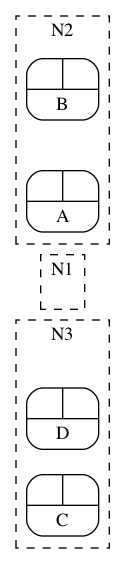

In [ ]:
graph3 = HierarchicalDcrGraph()

test_event3 = ["A", "B", "C", "D"]
test_group3 = ["N1", "N2", "N3"]

for event in test_event3:
    graph3.events.add(event)
    graph3.labels.add(event)
    graph3.label_map[event] = event
    graph3.marking.included.add(event)

for event in test_group3:
    graph3.events.add(event)
    graph3.labels.add(event)
    graph3.label_map[event] = event

graph3.nestedgroups["N2"] =  {"A", "B"} 
graph3.nestedgroups["N3"] =  {"C", "D"}
graph3.nestedgroups["N1"] =  {"N2", "N3"}

for group, events in graph3.nestedgroups.items():
    for e in events:
        graph1.nestedgroups_map[e] = group

pm4py.view_dcr(graph3)